In [2]:
import medmnist
#print("successfully installed madmnist, version:", medmnist.__version__)

#importing training, validating and testing data seperately
# from medmnist import PneumoniaMNIST
# dataset = PneumoniaMNIST(split="test", download=True)
# print(dataset)

import numpy as np
data = np.load('../Dataset/pneumoniamnist.npz')
data_train = data['train_images']
data_test = data['test_images']
data_val = data['val_images']
label_train = data['train_labels']
label_test = data['test_labels']
label_val = data['val_labels']
print(len(data_val))

524


In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Flatten the images and normalize pixel values

n_samples = len(data_train)
data_temp = data_train.reshape((n_samples, -1))
data_tr = StandardScaler().fit_transform(data_temp)

n_samples = len(data_test)
data_temp = data_test.reshape((n_samples, -1))
data_te = StandardScaler().fit_transform(data_temp)
n_samples = len(data_val)
data_temp = data_val.reshape((n_samples, -1))
data_va = StandardScaler().fit_transform(data_temp)

In [42]:
# Tried kernals and regularization parameters
kernels = ['linear', 'rbf', 'poly','sigmoid']
C = [0.1, 1, 10, 100, 1000, 10000]
# Initialize an empty dictionary to store results
accuracy_results = {'kernel': [], 'C': [], 'accu': [], 'valscore': []}

In [43]:
from sklearn.model_selection import cross_val_score

# To ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# trying different svm kernals with different regularization parameters
for i in kernels:
    for c in C:
        # Create an SVM classifier
        clf_svm = SVC(kernel= i , C = c)

        # Train the classifier
        clf_svm.fit(data_tr, label_train)

        # Make predictions on the test set
        y_pred = clf_svm.predict(data_te)

        # Evaluate the performance
        accu_svm = accuracy_score(label_test, y_pred)

        # storing performance values for plotting
        scores = cross_val_score(clf_svm, data_va, label_val, cv=5)

        accuracy_results['kernel'].append(i)
        accuracy_results['C'].append(c)
        accuracy_results['accu'].append(accu_svm)
        accuracy_results['valscore'].append(scores.mean())

        # Display classification report
        #print(f'Report for SVM with {i} kernal and regularization parameter = {c}:')
        #print(classification_report(label_test, y_pred))



In [14]:
len(accuracy_results['accu'])

24

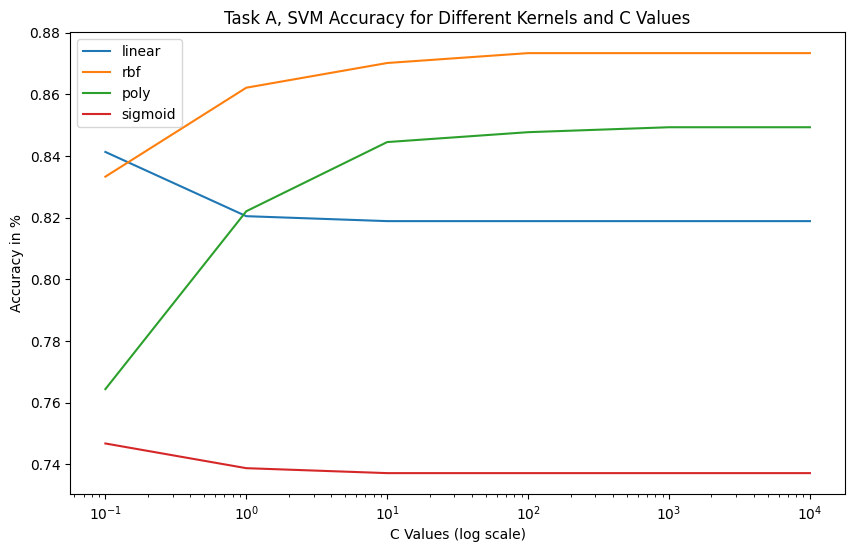

In [44]:
import pandas as pd
df_results = pd.DataFrame(accuracy_results)

fig, ax = plt.subplots(figsize=(10, 6))

for i in kernels:
    kernel_df = df_results[df_results['kernel'] == i]
    ax.plot(kernel_df['C'], kernel_df['accu'], label=i)

ax.set_xscale('log')

ax.set_xlabel('C Values (log scale)')
ax.set_ylabel('Accuracy in %')
ax.set_title('Task A, SVM Accuracy for Different Kernels and C Values')
ax.legend()
plt.show()

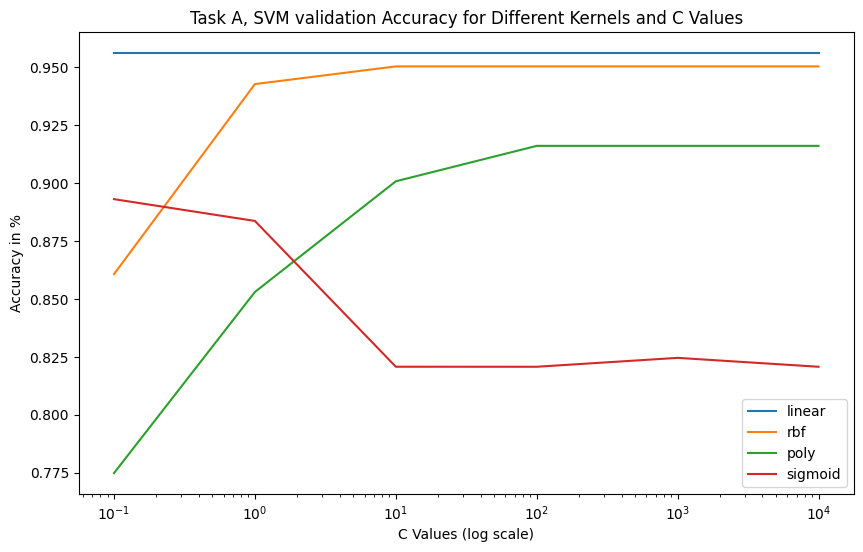

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in kernels:
    kernel_df = df_results[df_results['kernel'] == i]
    ax.plot(kernel_df['C'], kernel_df['valscore'], label=i)

ax.set_xscale('log')

ax.set_xlabel('C Values (log scale)')
ax.set_ylabel('Accuracy in %')
ax.set_title('Task A, SVM validation Accuracy for Different Kernels and C Values')
ax.legend()
plt.show()

In [51]:
print(max(accuracy_results['valscore']))

0.9561172161172161


In [ ]:
# Task A CNN method

%pip install tensorflow


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Reshape the input data as CNN requires
inshape = (28, 28, 1)  # image length, width and channels, which is 28,28,1 in task A
train_reshaped = np.reshape(data_train, (data_train.shape[0],) + inshape)
val_reshaped = np.reshape(data_val, (data_val.shape[0],) + inshape)
test_reshaped = np.reshape(data_test, (data_test.shape[0],) + inshape)


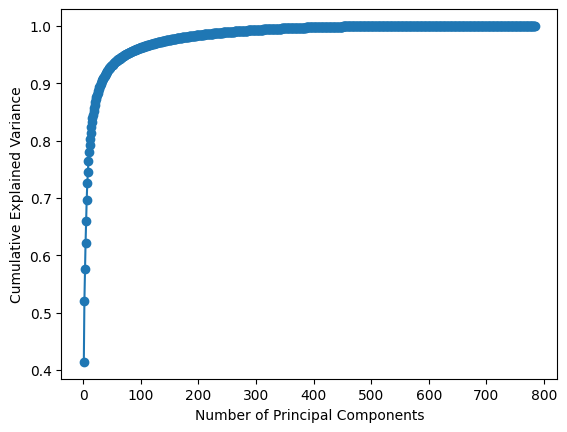

In [218]:
# PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_tr)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [20]:

# Define the CNN model
CNN_A = models.Sequential()

# Convolutional layers
CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=inshape))
CNN_A.add(layers.MaxPooling2D((2, 2)))
CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_A.add(layers.MaxPooling2D((2, 2)))
CNN_A.add(layers.BatchNormalization())
# CNN_A.add(layers.Conv2D(128, (3, 3), activation='relu'))
# CNN_A.add(layers.MaxPooling2D((2, 2)))
# CNN_A.add(layers.BatchNormalization())
CNN_A.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully connected layers
CNN_A.add(layers.Flatten())
CNN_A.add(layers.Dense(64, activation='relu'))
CNN_A.add(layers.Dense(1, activation='sigmoid'))  # As this is a binary classification

# Compile the model
CNN_A.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)


In [231]:
CNN_A.summary()

Model: "sequential_48"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_161 (B  (None, 28, 28, 1)         4         
 atchNormalization)                                              
                                                                 
 conv2d_162 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_116 (MaxPool  (None, 13, 13, 32)        0         
 ing2D)                                                          
                                                                 
 batch_normalization_162 (B  (None, 13, 13, 32)        128       
 atchNormalization)                                              
                                                                 
 conv2d_163 (Conv2D)         (None, 11, 11, 64)        18496     
                                                                 
 max_pooli

In [52]:
# Train the model
result_cnna = CNN_A.fit(train_reshaped, label_train, epochs=50, validation_data=(val_reshaped, label_val))
                        #callbacks = [early_stopping])

# Get the best validation accuracy from the training history
best_val_accuracy = max(result_cnna.history['val_accuracy'])
print("Best Validation Accuracy: {:.2f}%".format(best_val_accuracy * 100))

NameError: name 'CNN_A' is not defined

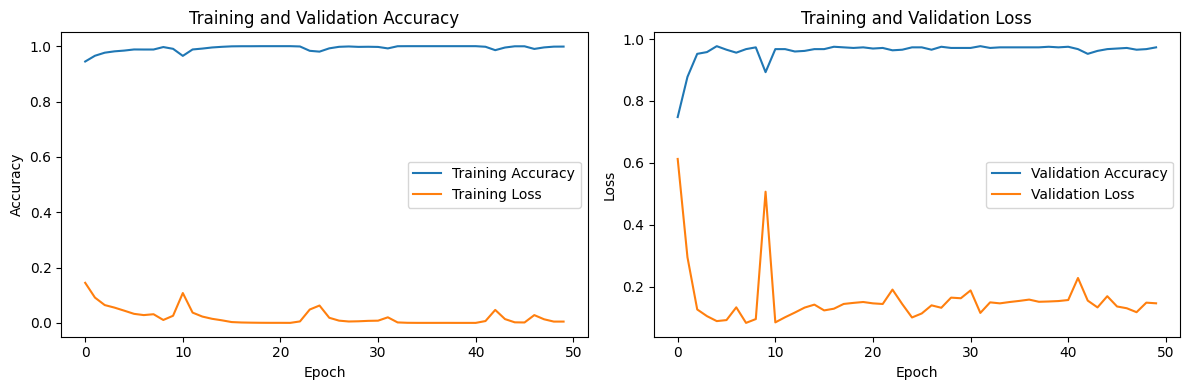

In [22]:
# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(result_cnna.history['accuracy'], label='Training Accuracy')
plt.plot(result_cnna.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(result_cnna.history['val_accuracy'], label='Validation Accuracy')
plt.plot(result_cnna.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
maxaccu_cnna = max(result_cnna.history['val_accuracy'])
print(f'The best validation obtained is {maxaccu_cnna}')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
result_cnn = np.round(CNN_A.predict(test_reshaped),0)
print("\nConfusion Matrix:")
print(confusion_matrix(label_test, result_cnn))
# accuracy = accuracy_score(label_test, result_cnn)
# print(f"Random Forest Accuracy: {accuracy}")
# Evaluate the model on the test data
test_loss, test_accuracy = CNN_A.evaluate(test_reshaped, label_test)
print(f"test accuracy is now {test_accuracy}")

The best validation obtained is 0.9809160232543945
20/20 [==============================] - 0s 1ms/step

Confusion Matrix:
[[149  85]
 [  2 388]]
20/20 [==============================] - 0s 2ms/step - loss: 1.1610 - accuracy: 0.8606
test accuracy is now 0.8605769276618958


In [173]:
try:
    CNN_A.save(filepath= '../A/my_saved_model')
    print('Saving model; Success')
except:
    print('Saving model failed')

INFO:tensorflow:Assets written to: ../A/my_saved_model\assets


INFO:tensorflow:Assets written to: ../A/my_saved_model\assets


Saving model; Success


In [16]:
import pandas as pd

# Distribution check

df = pd.DataFrame(label_test)

# Display the count of each category
df.head()
category_counts = df[0].value_counts()
print(category_counts)
print(len(df))
print(category_counts.min()/len(df))

0
1    390
0    234
Name: count, dtype: int64
624
0.375


In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have features X and labels y

# Create a Random Forest model
rf_modela = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_modela.fit(data_tr, label_train)

# Perform cross-validation
cv_scores = cross_val_score(rf_modela, data_va, label_val, cv=5)  
print("Mean Cross-Validation Score:", cv_scores.mean())

# Make predictions on the test set
y_pred = rf_modela.predict(data_te)

# Evaluate the model
accu_rf = accuracy_score(label_test, y_pred)
print("Test Accuracy:", accu_rf)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(label_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(label_test, y_pred))

Mean Cross-Validation Score: 0.9350915750915751
Test Accuracy: 0.8509615384615384

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.76       234
           1       0.82      0.97      0.89       390

    accuracy                           0.85       624
   macro avg       0.88      0.81      0.83       624
weighted avg       0.86      0.85      0.84       624


Confusion Matrix:
[[151  83]
 [ 10 380]]


In [226]:
# Applying PCA to training data
pca_used = PCA(n_components= 30) # 90% achieved by 30 PCs
data_tr_pca = pca_used.fit_transform(data_tr)
data_va_pca = pca_used.transform(data_va)
data_te_pca = pca_used.transform(data_te)

In [229]:
# Create a Random Forest model, using PCA this time
rf_modela2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_modela2.fit(data_tr_pca, label_train)

# Perform cross-validation
cv_scores = cross_val_score(rf_modela2, data_va_pca, label_val, cv=5)  
print("Mean Cross-Validation Score:", cv_scores.mean())

# Make predictions on the test set
y_pred = rf_modela2.predict(data_te_pca)

# Evaluate the model
accu_rf = accuracy_score(label_test, y_pred)
print("Test Accuracy:", accu_rf)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(label_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(label_test, y_pred))

Mean Cross-Validation Score: 0.9198534798534798
Test Accuracy: 0.8397435897435898

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74       234
           1       0.81      0.97      0.88       390

    accuracy                           0.84       624
   macro avg       0.87      0.80      0.81       624
weighted avg       0.85      0.84      0.83       624


Confusion Matrix:
[[146  88]
 [ 12 378]]
